In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [19]:
df = pd.read_csv('datasets/vehicle.csv')
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [20]:
df['class'].astype('category').cat.codes

0      2
1      2
2      1
3      2
4      0
      ..
841    1
842    2
843    1
844    1
845    2
Length: 846, dtype: int8

## Shape of the dataset
- Number of datapoints - 846
- Number of features - 19

In [21]:
df.shape

(846, 19)

- We can see that there are some null values in the dataset

In [22]:
df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

- From this 5 point summary, we can see all the featurea have different range of values.
- So we have to scale it to make sure that our model gives equal importance to all the features.

- Distribution of each class is not even but it is fairly enough to proceed with the model.

In [23]:
col = df.columns[df.isnull().any()]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


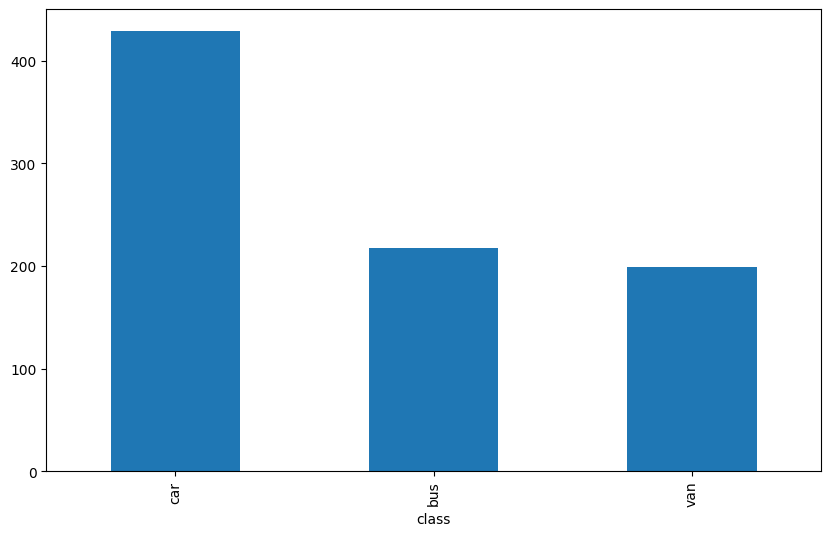

In [24]:
class_counts = df['class'].value_counts()

# Plot the counts as a bar plot
class_counts.plot(kind='bar', figsize=(10, 6))
plt.show()

## Correlation
- From the heatmap we can see that there are many multicorrelation features.
- Highly correlated features provide same information for the model.
- So we can drop the highly correlated features

In [25]:
class_labels = df['class'].copy()
df['class'] = df['class'].astype('category').cat.codes

<Axes: >

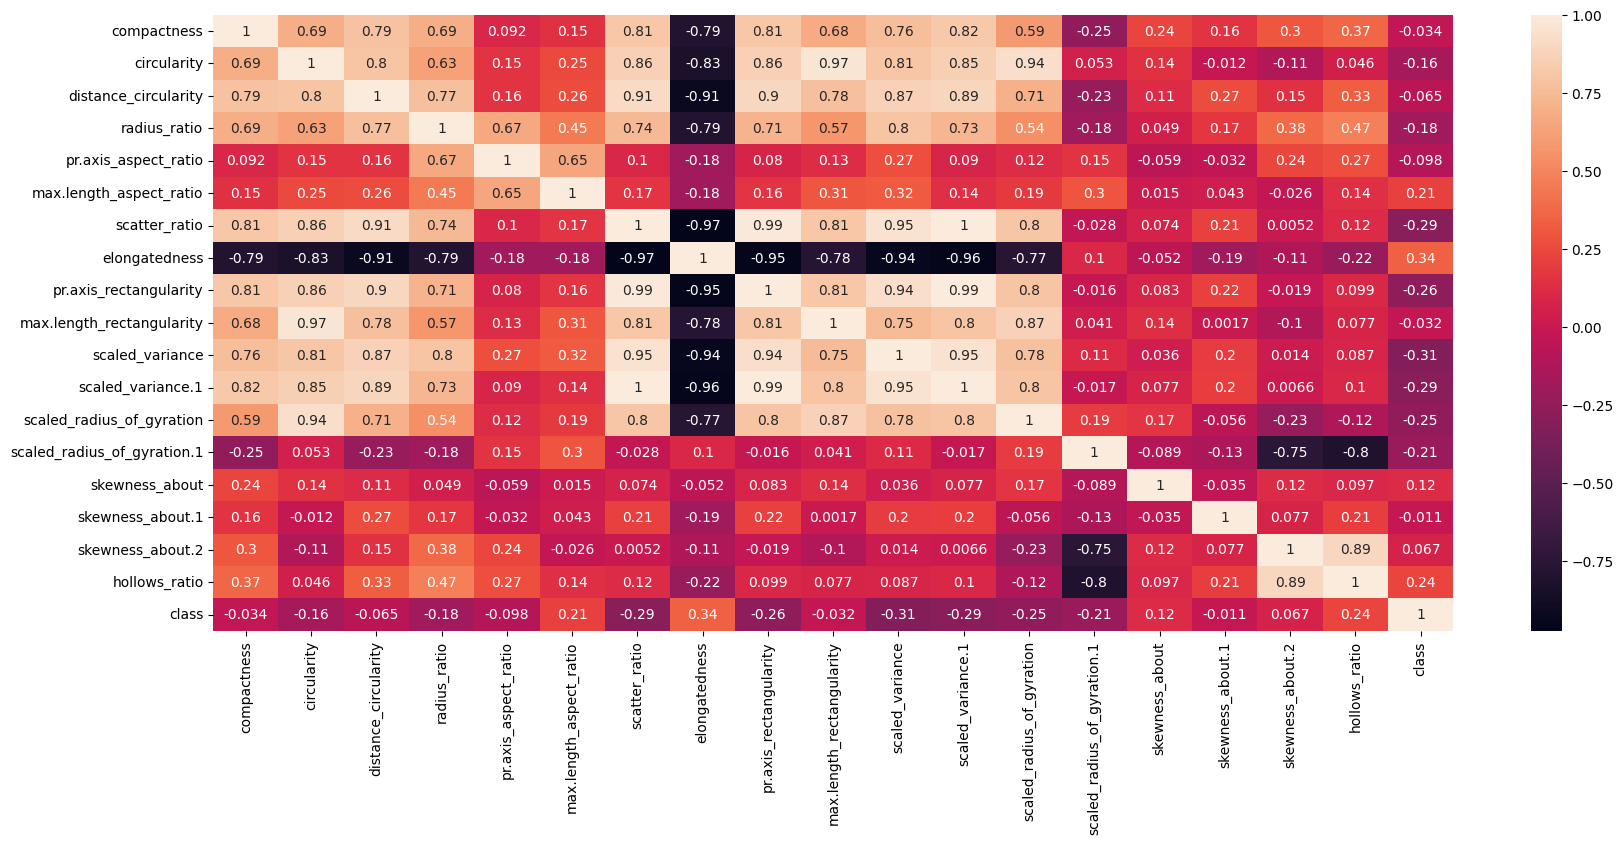

In [26]:
fig, ax = plt.subplots(figsize = [20, 8])
corr = df.corr() #Finding correlation of all the features
sns.heatmap(corr, annot = True)

In [28]:
corr.abs()
corr_pos = corr.abs()
mask = corr_pos < 0.8


<Axes: >

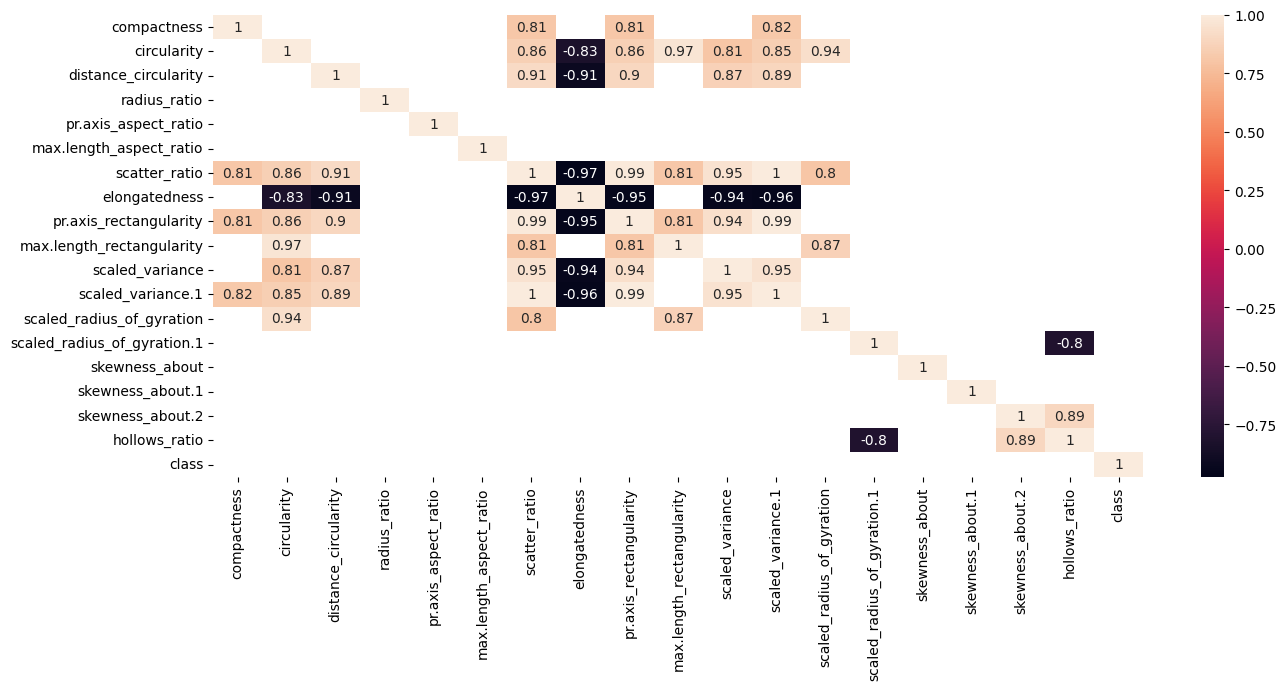

In [34]:
fig, ax = plt.subplots(figsize = [15, 6])
sns.heatmap(corr, annot = True, mask = mask)


- We can see that features (compactness, circularity, distance_circularity,elongatedness, pr.axis_rectangularity, max.length_rectangularity,scaled_variance, scaled_variance.1, scaled_radius_of_gyration) are highly correlated to scatter_ratio. So scatter_ratio alone will represent all these features.
- Similarly hollows_ratio alone represent the features scaled_radius_of_gyration.1, skewness_about.2

In [29]:
selected_columns = [
    'radius_ratio',
    'pr.axis_aspect_ratio',
    'max.length_aspect_ratio',
    'scatter_ratio',
    'skewness_about',
    'skewness_about.1',
    'hollows_ratio'
]

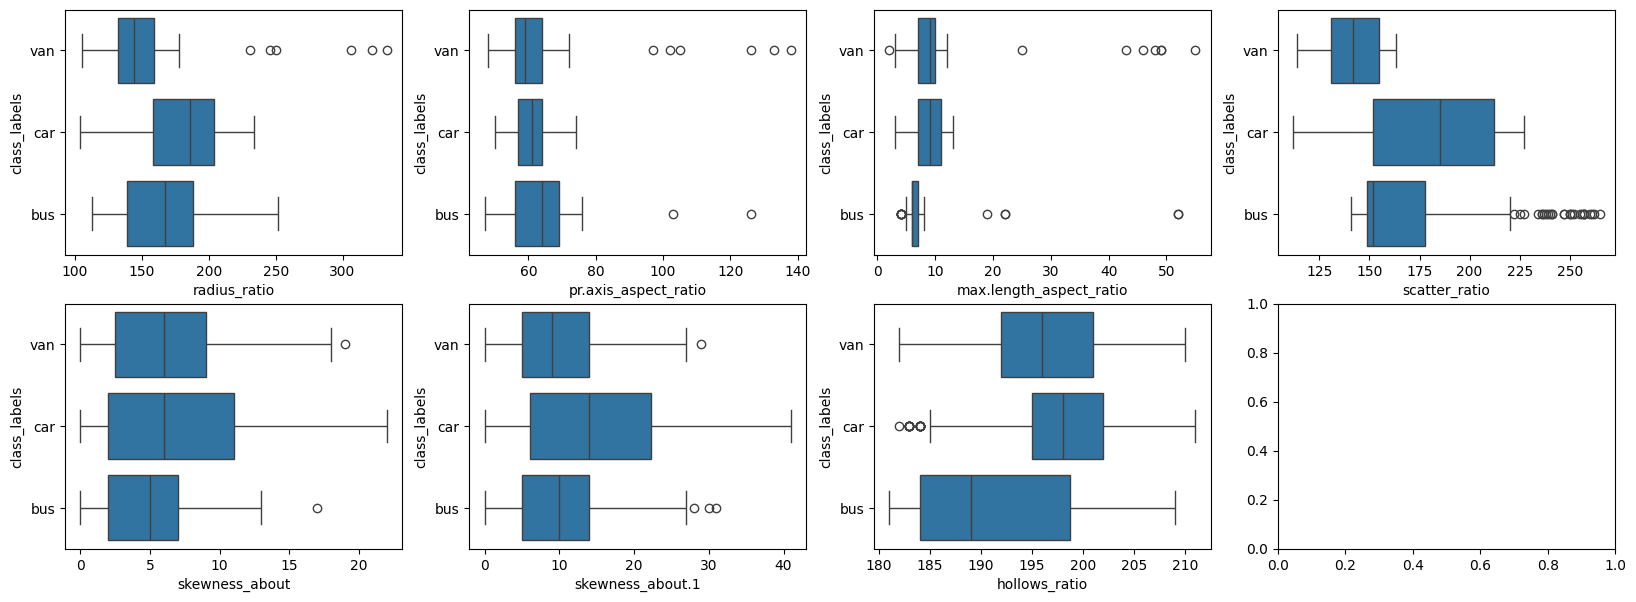

In [30]:
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = [20, 7])
df['class_labels'] = class_labels

for col, axes in zip(selected_columns, ax.flatten()):
  sns.boxplot(x = col, y = 'class_labels', data = df, ax = axes)

- This plot helps us to find the importance of each feature individually in predicting the target.
- The feature which has higher variation in box amoung the classes will contribute more in prediction.

## The plan is the next
- we have already chosen our features
- we need to impult the missing values by applying medians
- we need to replace the outliners. We see many of them on the box plots (we will use [1.5*IQR](https://medium.com/@prashant.nair2050/hands-on-outlier-detection-and-treatment-in-python-using-1-5-iqr-rule-f9ff1961a414))

In [31]:
def outlier_removal(ar):
  for i in range(ar.shape[1]):
    p = np.percentile(ar[:, i], [25, 75])
    iqr = p[1] - p[0]
    q1 = p[0]- 1.5*iqr
    q3 = p[1]+ 1.5*iqr
    ar[:, i][ar[:, i]<q1] = q1
    ar[:, i][ar[:, i]>q3] = q3
  return ar

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

In [34]:
x = df[selected_columns]
y = df['class']
seed = 3
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.3, random_state = seed)

In [35]:
preprocessor = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('outlier', FunctionTransformer(outlier_removal)),
    ('scale', StandardScaler()),
])

In [36]:
from sklearn.base import BaseEstimator, ClassifierMixin
import math

In [51]:

class NaiveBayesClassifierCustom(BaseEstimator, ClassifierMixin):
    def __init__(self):
        # Зберігаються частоти (або ймовірності) для моделі
        self.class_counts = {}        # Кількість прикладів кожного класу
        self.feature_value_counts = []# Список розміром num_features, 
                                      # де кожен елемент - словник {class -> {value -> count}}
        self.feature_values = []      # Список унікальних значень для кожної ознаки
        self.total_samples = 0        # Загальна кількість навчальних прикладів
        self.classes = []             # Список унікальних класів
    
    def fit(self, X, y):
        # Конвертуємо вхідні дані в numpy масиви для зручності
        X = np.asarray(X)
        y = np.asarray(y)
        
        self.total_samples = len(y)
        num_features = X.shape[1]
        
        # Підрахунок класів (апріорні)
        unique_classes, counts = np.unique(y, return_counts=True)
        self.classes = [cls.item() if hasattr(cls, 'item') else cls for cls in unique_classes]
        self.class_counts = {cls: count for cls, count in zip(self.classes, counts)}
        
        # Ініціалізація структур для підрахунку значень ознак
        self.feature_value_counts = [{cls: {} for cls in self.classes} for _ in range(num_features)]
        self.feature_values = [set() for _ in range(num_features)]
        
        # Підрахунок частот: скільки разів значення ознаки i зустрічається при класі cls
        for i in range(num_features):
            # Для кожної ознаки
            feature_col = X[:, i]
            
            # Знаходимо унікальні значення для цієї ознаки
            unique_values = np.unique(feature_col)
            
            # Додаємо унікальні значення (конвертовані в хешовані типи) до множини
            self.feature_values[i] = {val.item() if hasattr(val, 'item') else val for val in unique_values}
            
            # Для кожного класу підраховуємо частоти значень
            for cls in self.classes:
                # Знаходимо індекси, де клас == cls
                class_indices = np.where(y == cls)[0]
                
                # Значення ознаки для цих індексів
                class_feature_values = feature_col[class_indices]
                
                # Підрахунок частот унікальних значень
                unique_values_in_class, counts_in_class = np.unique(class_feature_values, return_counts=True)
                
                # Зберігаємо у словник (конвертуємо значення в хешовані типи)
                for val, count in zip(unique_values_in_class, counts_in_class):
                    hashable_val = val.item() if hasattr(val, 'item') else val
                    self.feature_value_counts[i][cls][hashable_val] = count
        
        return self
    
    def predict(self, X):
        X = np.asarray(X)
        
        # Перевіряємо розмірність вхідних даних
        if len(X.shape) == 1:
            # Якщо це один приклад (одновимірний масив)
            return self._predict_single(X)
        else:
            # Якщо це набір прикладів (двовимірний масив)
            return np.array([self._predict_single(features) for features in X])
    
    def _predict_single(self, features):
        # Обчислення лог-імовірностей для кожного класу
        best_class = None
        best_log_prob = -math.inf  # найкраща (максимальна) лог-імовірність
        
        for cls in self.classes:
            # log(P(C = cls))
            # Апріорна ймовірність P(C) = count(cls) / total_samples
            # Працюємо з логарифмами для зручності (уникнення дуже малих чисел)
            log_prob = math.log(self.class_counts[cls] / self.total_samples)
            
            # Для кожної ознаки додаємо log(P(feature = value | class = cls))
            for i, value in enumerate(features):
                # Конвертуємо значення в хешований тип
                hashable_value = value.item() if hasattr(value, 'item') else value
                
                # Кількість випадків, де ознака i = value при класі cls
                # Якщо такого значення при цьому класі не було, count = 0
                count = self.feature_value_counts[i][cls].get(hashable_value, 0)
                
                # Кількість різних значень ознаки i (для згладжування)
                N_values = len(self.feature_values[i])
                
                # Кількість прикладів класу cls
                class_count = self.class_counts[cls]
                
                # Ймовірність зі згладжуванням: (count + 1) / (class_count + N_values)
                # (Додаємо 1 до лічильника і до загального числа прикладів цього класу,
                #  щоб уникнути нульової ймовірності)
                prob = (count + 1) / (class_count + N_values)
                log_prob += math.log(prob)
            
            # Зберігаємо клас з найбільшою лог-імовірністю
            if log_prob > best_log_prob:
                best_log_prob = log_prob
                best_class = cls
                
        return best_class

In [48]:
class OneRClassifierCustom(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.best_feature = None        # Індекс найкращої ознаки після навчання
        self.rules = {}                 # Правила: значення ознаки -> передбачений клас
        self.default_class = None       # Клас за замовчуванням (якщо зустрінеться нове значення ознаки)
    
    def fit(self, X, y):
        # Конвертуємо вхідні дані в numpy масиви для зручності
        X = np.asarray(X)
        y = np.asarray(y)
        
        num_features = X.shape[1]              # Кількість ознак (стовпців)
        best_error = float('inf')             # Мінімальна кількість помилок (кращий результат)
        best_rules = None
        best_feature_index = None
        
        # Розрахувати загальний найбільш частий клас у датасеті (для default_class)
        unique_classes, class_counts = np.unique(y, return_counts=True)
        overall_majority_class = unique_classes[np.argmax(class_counts)]
        self.default_class = overall_majority_class  # клас за замовчуванням (глобальна мода)
        
        # Перебір кожної ознаки, щоб знайти найкращу
        for fi in range(num_features):
            # Підрахунок частоти класів для кожного значення ознаки fi
            value_class_counts = {}  # словник: значення ознаки -> {клас -> кількість}
            
            # Отримуємо значення поточної ознаки
            feature_values = X[:, fi]
            
            # Для кожного унікального значення ознаки
            for value in np.unique(feature_values):
                # Перетворюємо numpy тип в базовий Python тип для використання як ключ словника
                # Це вирішує проблему з хешуванням
                hashable_value = value.item() if hasattr(value, 'item') else value
                
                # Знаходимо всі індекси де значення ознаки дорівнює поточному значенню
                indices = np.where(feature_values == value)[0]
                
                # Підраховуємо класи для цих індексів
                value_classes = y[indices]
                unique_value_classes, value_class_counts_arr = np.unique(value_classes, return_counts=True)
                
                # Зберігаємо підрахунок у словнику
                value_class_counts[hashable_value] = {
                    cls: count for cls, count in zip(unique_value_classes, value_class_counts_arr)
                }
            
            # Визначення правил для ознаки fi та підрахунок помилок
            rules = {}   # правила для поточної ознаки: значення -> прогнозований клас
            errors = 0   # кількість помилок при використанні цієї ознаки
            
            for value, class_count_map in value_class_counts.items():
                # Найбільш частий клас для даного значення ознаки (правило)
                best_class_for_value = max(class_count_map, key=class_count_map.get)
                rules[value] = best_class_for_value
                
                # Помилки: усі випадки цього значення, що не належать до best_class_for_value
                total_for_value = sum(class_count_map.values())
                errors_for_value = total_for_value - class_count_map[best_class_for_value]
                errors += errors_for_value
            
            # Перевірка, чи ця ознака краща (менше помилок)
            if errors < best_error:
                best_error = errors
                best_feature_index = fi
                best_rules = rules
        
        # Зберегти кращу ознаку та її правила
        self.best_feature = best_feature_index
        self.rules = best_rules
        
        return self
    
    def predict(self, X):
        X = np.asarray(X)
        
        # Перевіряємо розмірність вхідних даних
        if len(X.shape) == 1:
            # Якщо це один приклад (одновимірний масив)
            value = X[self.best_feature]
            # Перетворюємо значення в хешований тип, якщо потрібно
            hashable_value = value.item() if hasattr(value, 'item') else value
            return self.rules.get(hashable_value, self.default_class)
        else:
            # Якщо це набір прикладів (двовимірний масив)
            predictions = []
            for row in X:
                value = row[self.best_feature]
                # Перетворюємо значення в хешований тип, якщо потрібно
                hashable_value = value.item() if hasattr(value, 'item') else value
                predicted_class = self.rules.get(hashable_value, self.default_class)
                predictions.append(predicted_class)
            return np.array(predictions)

In [52]:
class DecisionTreeClassifierCustom(BaseEstimator, ClassifierMixin):
    def __init__(self, max_depth=None, min_samples_split=2):
        self.tree = None  # дерево буде зберігатись як вкладені словники
        self.max_depth = max_depth  # максимальна глибина дерева
        self.min_samples_split = min_samples_split  # мінімальна кількість прикладів для розбиття
        self.default_class = None  # переважний клас для випадків відсутності значення

    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)
        
        # Визначаємо переважний клас у всьому наборі даних
        unique_classes, counts = np.unique(y, return_counts=True)
        self.default_class = unique_classes[np.argmax(counts)]
        
        # Зберігаємо всі класи
        self.classes_ = unique_classes
        
        # Побудувати дерево рекурсивно, починаючи з усіх індексів прикладів і всіх доступних ознак
        features = list(range(X.shape[1]))  # індекси всіх ознак, які ще можна використовувати
        self.tree = self._build_tree(X, y, np.array(range(len(y))), features, depth=0)
        
        return self

    def _build_tree(self, X, y, indices, feature_indices, depth=0):
        # 1. Якщо всі приклади належать до одного класу - повернути листок
        current_classes = y[indices]
        unique_classes = np.unique(current_classes)
        
        if len(unique_classes) == 1:
            return {"label": unique_classes[0].item() if hasattr(unique_classes[0], 'item') else unique_classes[0]}
        
        # 2. Перевірка умов зупинки (max_depth, min_samples_split)
        if (self.max_depth is not None and depth >= self.max_depth) or \
           len(indices) < self.min_samples_split or \
           len(feature_indices) == 0:
            # Повертаємо листок з переважним класом
            classes, counts = np.unique(current_classes, return_counts=True)
            majority_class = classes[np.argmax(counts)]
            return {"label": majority_class.item() if hasattr(majority_class, 'item') else majority_class}

        # 3. Обчислити ентропію поточного вузла
        def entropy(idxs):
            classes_subset = y[idxs]
            _, counts = np.unique(classes_subset, return_counts=True)
            probabilities = counts / len(idxs)
            return -np.sum(probabilities * np.log2(probabilities))

        base_entropy = entropy(indices)

        # 4. Вибрати найкращу ознаку для розбиття (максимальний інформаційний приріст)
        best_feature = None
        best_info_gain = 0.0
        best_splits = None  # збережемо розбиття для найкращої ознаки
        
        for feature in feature_indices:
            # Розбити поточні дані за цією ознакою
            feature_values = X[indices, feature]
            unique_values = np.unique(feature_values)
            
            # Словник для зберігання розбиття
            splits = {}
            
            # Для кожного значення ознаки знаходимо відповідні індекси
            for value in unique_values:
                # Конвертуємо значення в хешований тип
                hashable_value = value.item() if hasattr(value, 'item') else value
                
                # Знаходимо індекси, де значення ознаки дорівнює поточному
                # Спочатку знаходимо маску для значень
                mask = feature_values == value
                # Потім застосовуємо маску до індексів
                value_indices = indices[mask]
                
                splits[hashable_value] = value_indices
            
            # Обчислити ентропію після розбиття (зважену суму ентропій підмножин)
            new_entropy = 0.0
            for subset_indices in splits.values():
                if len(subset_indices) == 0:
                    continue
                subset_entropy = entropy(subset_indices)
                new_entropy += (len(subset_indices) / len(indices)) * subset_entropy
                
            info_gain = base_entropy - new_entropy
            if info_gain > best_info_gain:
                best_info_gain = info_gain
                best_feature = feature
                best_splits = splits

        if best_feature is None or best_info_gain <= 0:
            # Якщо не вдалося знайти розбиття, повертаємо листок з переважним класом
            classes, counts = np.unique(current_classes, return_counts=True)
            majority_class = classes[np.argmax(counts)]
            return {"label": majority_class.item() if hasattr(majority_class, 'item') else majority_class}

        # 5. Створити піддерева для кожного значення найкращої ознаки
        tree = {
            "feature": best_feature, 
            "branches": {},
            "majority_class": self.default_class.item() if hasattr(self.default_class, 'item') else self.default_class
        }
        
        # Зберігаємо переважний клас в цьому вузлі для випадків, коли зустрінеться нове значення
        classes, counts = np.unique(current_classes, return_counts=True)
        tree["majority_class"] = classes[np.argmax(counts)].item() if hasattr(classes[np.argmax(counts)], 'item') else classes[np.argmax(counts)]
        
        # Видалити використану ознаку зі списку доступних
        remaining_features = [f for f in feature_indices if f != best_feature]
        
        for value, subset_indices in best_splits.items():
            if len(subset_indices) == 0:
                # Якщо підмножина порожня, привласнити листок з переважним класом поточного вузла
                tree["branches"][value] = {"label": tree["majority_class"]}
            else:
                # Рекурсивно побудувати піддерево для підмножини
                tree["branches"][value] = self._build_tree(X, y, subset_indices, remaining_features, depth + 1)
                
        return tree

    def predict(self, X):
        X = np.asarray(X)
        
        if len(X.shape) == 1:
            # Один приклад
            return np.array([self._predict_single(X)])
        else:
            # Набір прикладів
            return np.array([self._predict_single(features) for features in X])

    def _predict_single(self, features):
        if self.tree is None:
            return self.default_class
            
        node = self.tree
        # Спускатись по дереву, поки не дійдемо до листка
        while "label" not in node:
            # Отримати індекс ознаки для розбиття в цьому вузлі
            feature_idx = node["feature"]
            value = features[feature_idx]
            
            # Конвертуємо значення в хешований тип
            hashable_value = value.item() if hasattr(value, 'item') else value
            
            # Якщо для цього значення немає гілки, повертаємо переважний клас цього вузла
            if hashable_value not in node["branches"]:
                return node["majority_class"]
                
            node = node["branches"][hashable_value]
            
        return node["label"]
    
   

In [41]:
class KNNClassifierCustom(BaseEstimator, ClassifierMixin):
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None
    
    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        return self
    
    def predict(self, X):
        X = np.array(X)
        if X.ndim == 1:
            return self._predict_one(X)
        else:
            return np.array([self._predict_one(x) for x in X])
    
    def _predict_one(self, x):
        distances = []
                
        for i, xi in enumerate(self.X_train):
            # Calculate Euclidean distance
            dist = np.sqrt(np.sum((xi - x) ** 2))
            distances.append((dist, self.y_train[i]))
        
        distances.sort(key=lambda d: d[0])
        nearest_neighbors = distances[:self.k]
        
        class_votes = {}
        for _, neighbor_class in nearest_neighbors:
            class_votes[neighbor_class] = class_votes.get(neighbor_class, 0) + 1
        
        predicted_class = max(class_votes, key=class_votes.get)
        return predicted_class

In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.classifier import OneRClassifier

classifiers = {
    'Naive Bayes': GaussianNB(),
    'Naive Bayes Custom': NaiveBayesClassifierCustom(),
    'One Rule': OneRClassifier(),
    'One Rule Custom': OneRClassifierCustom(),
    'Decision Tree': DecisionTreeClassifier(random_state=seed),
    'Decision Tree Custom': DecisionTreeClassifierCustom(),
    'kNN': KNeighborsClassifier(),
    'kNN Custom': KNNClassifierCustom(),
}

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
results = []

for name, clf in classifiers.items():
    pipeline_clf = Pipeline([
        ('preprocess', preprocessor),
        ('classifier', clf)
    ])
    
    pipeline_clf.fit(x_train, y_train)
    
    y_pred = pipeline_clf.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    
    results.append({
        'Classifier': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

/home/illia/Programming/Univ/data_mining/data_mining_laba_1/venv/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/home/illia/Programming/Univ/data_mining/data_mining_laba_1/venv/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/home/illia/Programming/Univ/data_mining/data_mining_laba_1/venv/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an 

In [59]:
results_df = pd.DataFrame(results)
results_df

,Classifier,Accuracy,Precision,Recall,F1 Score
0,Naive Bayes,0.700787,0.717627,0.691205,0.682640
1,Naive Bayes Custom,0.688976,0.671182,0.687666,0.676729
2,One Rule,0.582677,0.563343,0.578454,0.565615
3,One Rule Custom,0.566929,0.543278,0.555397,0.545018
4,Decision Tree,0.862205,0.869794,0.852286,0.859904
5,Decision Tree Custom,0.602362,0.574073,0.579080,0.573076
6,kNN,0.870079,0.859182,0.857861,0.857018
7,kNN Custom,0.870079,0.855300,0.860833,0.857548
